# Behavioral result

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
sns.set_theme(style="darkgrid")

Participants: 163
Adult: 41
Adolescent: 66
Children: 56


<AxesSubplot:>

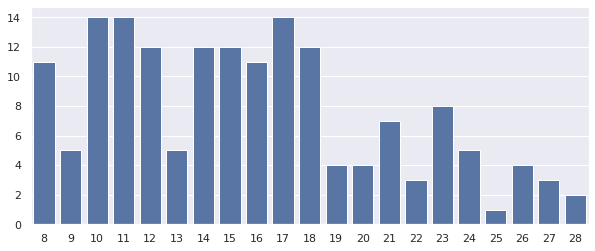

In [6]:
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data = pd.read_csv(beha_total_score,sep='\t')
data = data[data['meg_behavior']==1]
adult_num = len(data[data['Age']>18])
ado_num = len(data.query("18>=Age>12"))
children_num = len(data[data['Age']<=12])

print("Participants:", len(data))
print("Adult:",adult_num)
print("Adolescent:",ado_num)
print("Children:", children_num)

ages = []
nums = []
for subs in data.groupby('Age'):
    ages.append(subs[0])
    nums.append(len(subs[1]))
fig = plt.subplots(figsize=(10,4))
sns.barplot(x=ages,y=nums,color='b')

## Training performance

163


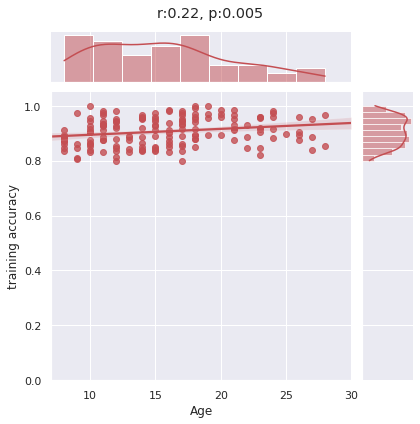

In [7]:
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data = pd.read_csv(beha_total_score,sep='\t')
data = data[data['meg_behavior']==1]
print(len(data))
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2
#correlation
res = pearsonr(data['Age'],data['training_acc'])
r = res[0]
p = res[1]

# plot
g = sns.jointplot(x="Age", y="training_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(7, 30), ylim=(0, 1.05),
                  color="r", height=6)
#move overall title up
g.set_axis_labels('Age', 'training accuracy')
g.fig.subplots_adjust(top=0.92)
if p < 0.001:
    g.fig.suptitle('r:{}  p<0.001'.format(round(r,3)))
else:
    g.fig.suptitle('r:{}, p:{}'.format(round(r,3),round(p,3)))

savepath = r'/mnt/workdir/DCM/result/behaviour/age-training.png'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)

## Age - 1D Inference

163


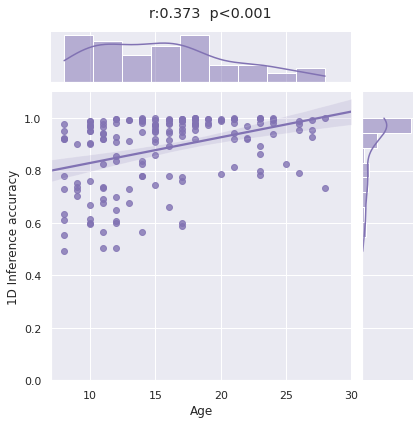

In [8]:
beha_total_score = r'//mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['meg_behavior']==1]
print(len(data))
res = pearsonr(data['Age'],data['1D_acc'])
r = res[0]
p = res[1]

# plot
g = sns.jointplot(x="Age", y="1D_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(7, 30), ylim=(0, 1.1),
                  color="m", height=6)

#move overall title up
g.set_axis_labels('Age', '1D Inference accuracy')
g.fig.subplots_adjust(top=0.92)
if p < 0.001:
    g.fig.suptitle('r:{}  p<0.001'.format(round(r,3)))
else:
    g.fig.suptitle('r:{}, p:{}'.format(round(r,3),round(p,3)))

savepath = r'/mnt/workdir/DCM/result/behaviour/age-1Dtask.png'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)

## Age - 2D Inference game1

163


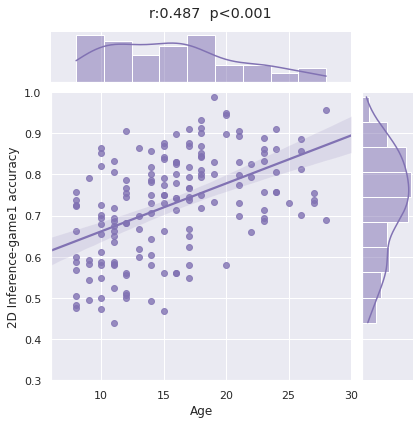

In [20]:
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['game1_behavior']==1]
print(len(data))
res = pearsonr(data['Age'],data['game1_acc'])
r = res[0]
p = res[1]

# plot
g = sns.jointplot(x="Age", y="game1_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(6, 30), ylim=(0.3, 1),
                  color="m", height=6)

#move overall title up
g.set_axis_labels('Age', '2D Inference-game1 accuracy')
g.fig.subplots_adjust(top=0.92)
if p < 0.001:
    g.fig.suptitle('r:{}  p<0.001'.format(round(r,3)))
else:
    g.fig.suptitle('r:{}, p:{}'.format(round(r,3),round(p,3)))

savepath = r'/mnt/workdir/DCM/result/behaviour/age-2Dgame1.png'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)

<AxesSubplot:>

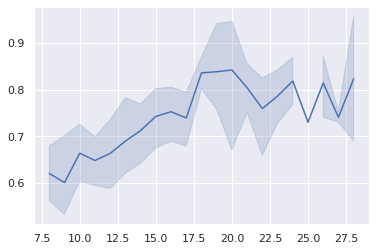

In [21]:
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')

data = data[data['game1_behavior']==1]
ages = []
accs = []
for sub in data.itertuples():
    ages.append(sub.Age)
    accs.append(sub.game1_acc)

sns.lineplot(x=ages,y=accs)

### Partial correlation: Age - 2D Inference game1 by controling training performance

In [22]:
import pingouin as pg

beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['game1_behavior']==1]
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2
pg.partial_corr(data=data, x='Age', y='game1_acc', covar=['training_acc'])

,n,r,CI95%,p-val
pearson,163,0.450929,"[0.32, 0.57]",1.726362e-09


# Game2

#### Subject information

Participants: 156
Adult: 41
Adolescent: 64
Children: 51


<AxesSubplot:>

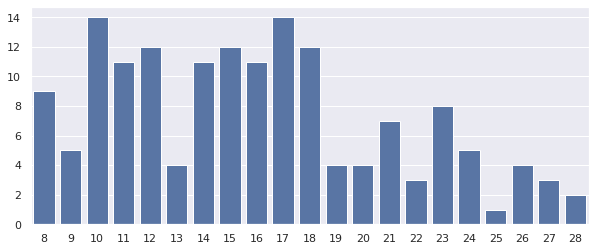

In [12]:
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data = pd.read_csv(beha_total_score,sep='\t')
data = data[data['game2_behavior']==1]
adult_num = len(data[data['Age']>18])
ado_num = len(data.query("18>=Age>12"))
children_num = len(data[data['Age']<=12])

print("Participants:", len(data))
print("Adult:",adult_num)
print("Adolescent:",ado_num)
print("Children:", children_num)
ages = []
nums = []
for subs in data.groupby('Age'):
    ages.append(subs[0])
    nums.append(len(subs[1]))
fig = plt.subplots(figsize=(10,4))
sns.barplot(x=ages,y=nums,color='b')

### Age - game2

156


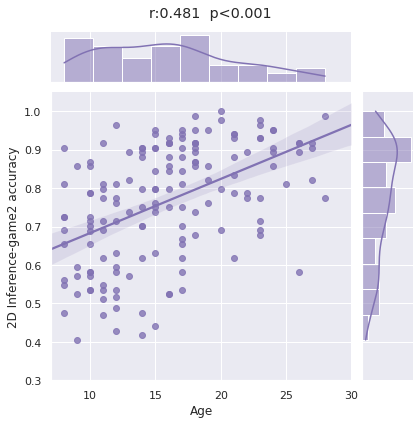

In [13]:
#age-game2
beha_total_score = r'//mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['game2_behavior']==1]

print(len(data))
# cal correlation
res = pearsonr(data['Age'],data['game2_test_acc'])
r = res[0]
p = res[1]
# plot
g = sns.jointplot(x="Age", y="game2_test_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(7, 30), ylim=(0.3, 1.05),
                  color="m", height=6)
#move overall title up
g.set_axis_labels('Age', '2D Inference-game2 accuracy')
g.fig.subplots_adjust(top=0.92)
if p < 0.001:
    g.fig.suptitle('r:{}  p<0.001'.format(round(r,3)))
else:
    g.fig.suptitle('r:{}, p:{}'.format(round(r,3),round(p,3)))

savepath = r'/mnt/workdir/DCM/result/behaviour/age-2Dgame2test.png'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)

156


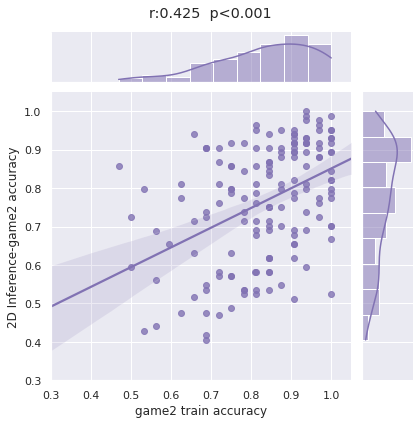

In [14]:
#age-game2
beha_total_score = r'//mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['game2_behavior']==1]
data['game2_training_acc'] = (data['game2_train_ap'] + data['game2_train_ap'])/2
print(len(data))
# cal correlation
res = pearsonr(data['game2_training_acc'],data['game2_test_acc'])
r = res[0]
p = res[1]
# plot
g = sns.jointplot(x="game2_training_acc", y="game2_test_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(0.3, 1.05), ylim=(0.3, 1.05),
                  color="m", height=6)
#move overall title up
g.set_axis_labels('game2 train accuracy', '2D Inference-game2 accuracy')
g.fig.subplots_adjust(top=0.92)
if p < 0.001:
    g.fig.suptitle('r:{}  p<0.001'.format(round(r,3)))
else:
    g.fig.suptitle('r:{}, p:{}'.format(round(r,3),round(p,3)))

savepath = r'/mnt/workdir/DCM/result/behaviour/game2trian-game2test.png'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)

###  Age -  correlation between game1 and game2

/home/dell/Software/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


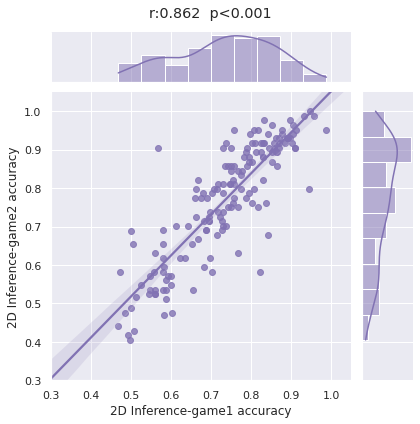

In [15]:
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['game2_behavior']==1]

# plot
g = sns.jointplot(x="game1_acc", y="game2_test_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(0.3, 1.05), ylim=(0.3, 1.05),
                  color="m", height=6)

res = pearsonr(data['game1_acc'],data['game2_test_acc'])
r = res[0]
p = res[1]

#move overall title up
g.set_axis_labels('2D Inference-game1 accuracy', '2D Inference-game2 accuracy')
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle('r:{}  p:{}'.format(r,p))
if p < 0.001:
    g.fig.suptitle('r:{}  p<0.001'.format(round(r,3)))
else:
    g.fig.suptitle('r:{}, p:{}'.format(round(r,3),round(p,3)))

savepath = r'/mnt/workdir/DCM/result/behaviour/game1-game2.png'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)

In [16]:
import pandas as pd
import statsmodels.api as sm

beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['game1_behavior']==1]
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2

print(len(data))
X = data[['Age','training_acc']]
Y = data['game1_acc']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model_summary = model.summary()
print(model_summary)

163
                            OLS Regression Results                            
Dep. Variable:              game1_acc   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     69.66
Date:                Thu, 22 Sep 2022   Prob (F-statistic):           1.74e-22
Time:                        15:44:36   Log-Likelihood:                 160.08
No. Observations:                 163   AIC:                            -314.2
Df Residuals:                     160   BIC:                            -304.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.5082      0.129     -3.92

## game2 GLM

In [17]:
import pandas as pd
import statsmodels.api as sm

beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['game2_behavior']==1]
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2
data['game2_training_acc'] = (data['game2_train_ap'] + data['game2_train_ap'])/2

print(len(data))
X = data[['Age','game1_acc','game2_training_acc']]
Y = data['game2_test_acc']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model_summary = model.summary()
print(model_summary)

156
                            OLS Regression Results                            
Dep. Variable:         game2_test_acc   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     153.8
Date:                Thu, 22 Sep 2022   Prob (F-statistic):           7.74e-46
Time:                        15:44:36   Log-Likelihood:                 182.21
No. Observations:                 156   AIC:                            -356.4
Df Residuals:                     152   BIC:                            -344.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0525   

In [18]:
import pandas as pd
import statsmodels.api as sm


beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['game2_behavior']==1]
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2
data['game2_training_acc'] = (data['game2_train_ap'] + data['game2_train_ap'])/2

print(len(data))
X = data[['Age','game1_acc']]
Y = data['game2_training_acc']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model_summary = model.summary()
print(model_summary)

156
                            OLS Regression Results                            
Dep. Variable:     game2_training_acc   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     34.96
Date:                Thu, 22 Sep 2022   Prob (F-statistic):           3.13e-13
Time:                        15:44:36   Log-Likelihood:                 132.18
No. Observations:                 156   AIC:                            -258.4
Df Residuals:                     153   BIC:                            -249.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5123      0.051     10.050     